# Data Cleaning and plotting

## Import libraries and sql_functions.py

In [8]:
import sqlalchemy
import pandas as pd
import numpy as np
import sql_functions as sf

from sql_functions import *

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

## Create connection to DBeaver

### set schema

In [9]:
schema = 'muc_analytics_22_1'

## call flight table for origin airports (faw_origin_g5)

In [10]:
origin_df = sf.get_dataframe(f'SELECT * FROM {schema}.faw_origin_g5')
origin_df

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,...,alt,tz,dst,city,country,date,avg_temp,rain,wind_speed,w_faa
0,2017-08-12,1429.0,1430,-1.0,1654.0,1701,-7.0,B6,N556JB,477,...,13,-5.0,A,New York,United States,2017-08-12,21.9,5.3,12.2,JFK
1,2017-08-12,2104.0,2033,31.0,2343.0,2332,11.0,B6,N955JB,483,...,13,-5.0,A,New York,United States,2017-08-12,21.9,5.3,12.2,JFK
2,2017-08-12,2331.0,2250,41.0,55.0,15,40.0,B6,N247JB,486,...,13,-5.0,A,New York,United States,2017-08-12,21.9,5.3,12.2,JFK
3,2017-08-12,558.0,600,-2.0,905.0,855,10.0,B6,N746JB,501,...,13,-5.0,A,New York,United States,2017-08-12,21.9,5.3,12.2,JFK
4,2017-08-12,725.0,734,-9.0,833.0,849,-16.0,B6,N298JB,508,...,13,-5.0,A,New York,United States,2017-08-12,21.9,5.3,12.2,JFK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39487,2017-08-12,1731.0,1630,61.0,1908.0,1758,70.0,B6,N249JB,408,...,13,-5.0,A,New York,United States,2017-08-12,21.9,5.3,12.2,JFK
39488,2017-08-12,1137.0,1120,17.0,1440.0,1351,49.0,B6,N535JB,411,...,13,-5.0,A,New York,United States,2017-08-12,21.9,5.3,12.2,JFK
39489,2017-08-12,921.0,925,-4.0,1252.0,1249,3.0,B6,N968JB,415,...,13,-5.0,A,New York,United States,2017-08-12,21.9,5.3,12.2,JFK
39490,2017-08-12,2153.0,2128,25.0,2254.0,2256,-2.0,B6,N323JB,418,...,13,-5.0,A,New York,United States,2017-08-12,21.9,5.3,12.2,JFK


## check cancelled flights for origin airport

### Pivot table (cancelled_origin)

In [11]:
cancelled_origin = pd.pivot_table(origin_df,
                                  values= 'cancelled',
                                  index= 'flight_date',
                                  columns='origin',
                                  aggfunc= np.sum)
cancelled_origin

origin,DFW,IAH,JFK,MSY
flight_date,,,,
2017-08-01,1,0,4,0
2017-08-02,9,4,41,2
2017-08-03,6,2,17,2
2017-08-04,7,4,21,6
2017-08-05,1,1,3,1
2017-08-06,16,3,1,3
2017-08-07,20,26,13,3
2017-08-08,0,0,3,1
2017-08-09,2,0,0,1


### Line graph (cancelled_origin)

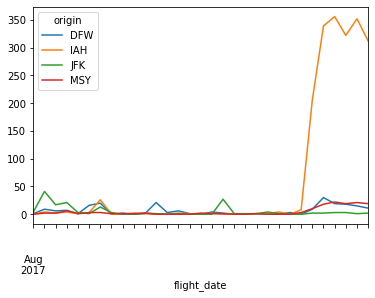

In [12]:
cancelled_origin.plot(xticks=cancelled_origin.index);

### Bar chart (cancelled_origin)

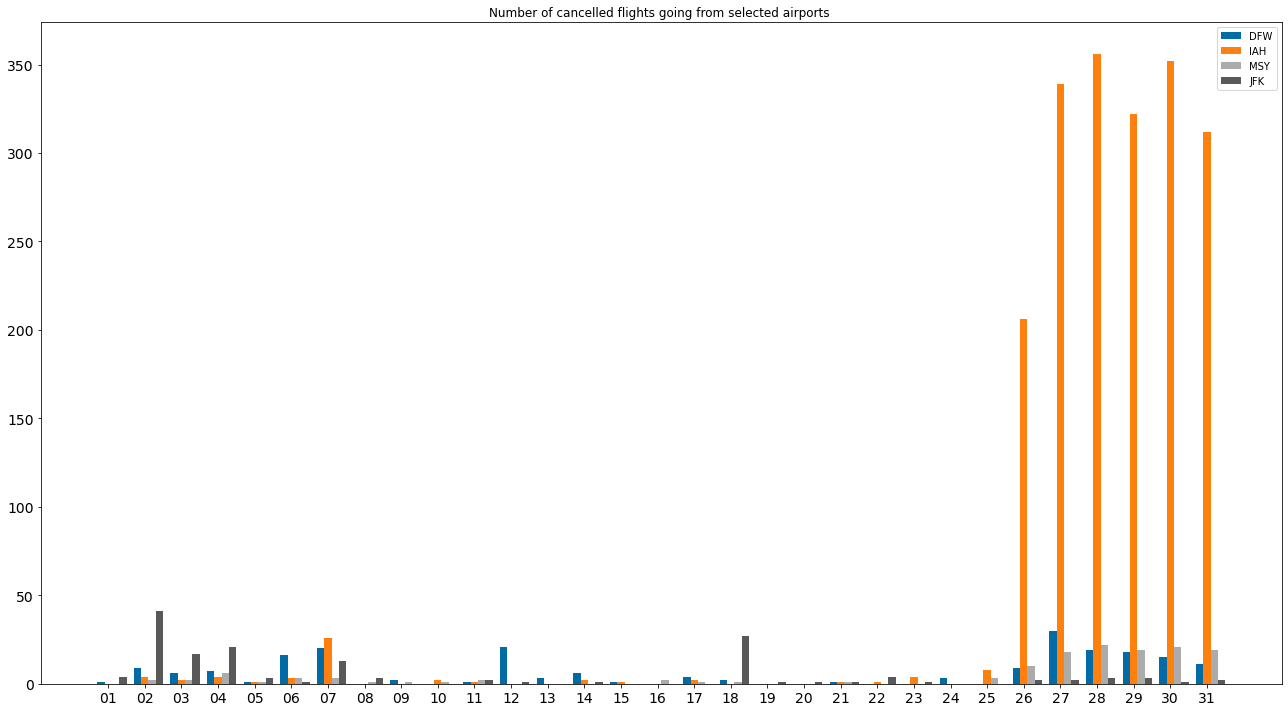

In [13]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize= (18,10))

date_list = list(cancelled_origin.reset_index(0)['flight_date'].dt.strftime('%d'))
x_indexes = np.arange(len(date_list))
width = 0.2

plt.bar(x_indexes - width, cancelled_origin['DFW'], width=width, label= 'DFW')
plt.bar(x_indexes, cancelled_origin['IAH'], width=width, label= 'IAH')
plt.bar(x_indexes + width, cancelled_origin['MSY'], width=width, label = 'MSY')
plt.bar(x_indexes + 2*width, cancelled_origin['JFK'], width=width, label = 'JFK')

plt.title("Number of cancelled flights going from selected airports ")
plt.xticks(ticks= x_indexes, labels= date_list, fontsize= 14)
plt.yticks(fontsize= 14)

plt.legend()
plt.tight_layout()

## check diverted flights for origin airport

### Pivot table (diverted_origin)

In [14]:
diverted_origin = pd.pivot_table(origin_df, 
                                 values= 'diverted',
                                 index= 'flight_date',
                                 columns='origin',
                                 aggfunc= np.sum)
diverted_origin

origin,DFW,IAH,JFK,MSY
flight_date,,,,
2017-08-01,0,1,0,0
2017-08-02,8,6,1,1
2017-08-03,1,1,1,0
2017-08-04,0,1,0,0
2017-08-05,1,2,0,0
2017-08-06,0,0,1,0
2017-08-07,0,0,1,0
2017-08-08,1,2,0,0
2017-08-09,0,0,0,0


### Line graph (diverted_origin)

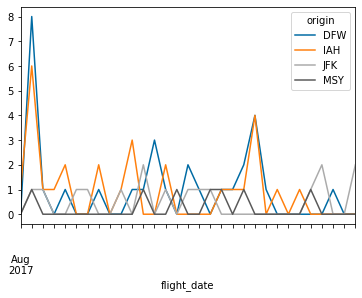

In [15]:
diverted_origin.plot(xticks=diverted_origin.index);

### Bar chart (diverted_origin)

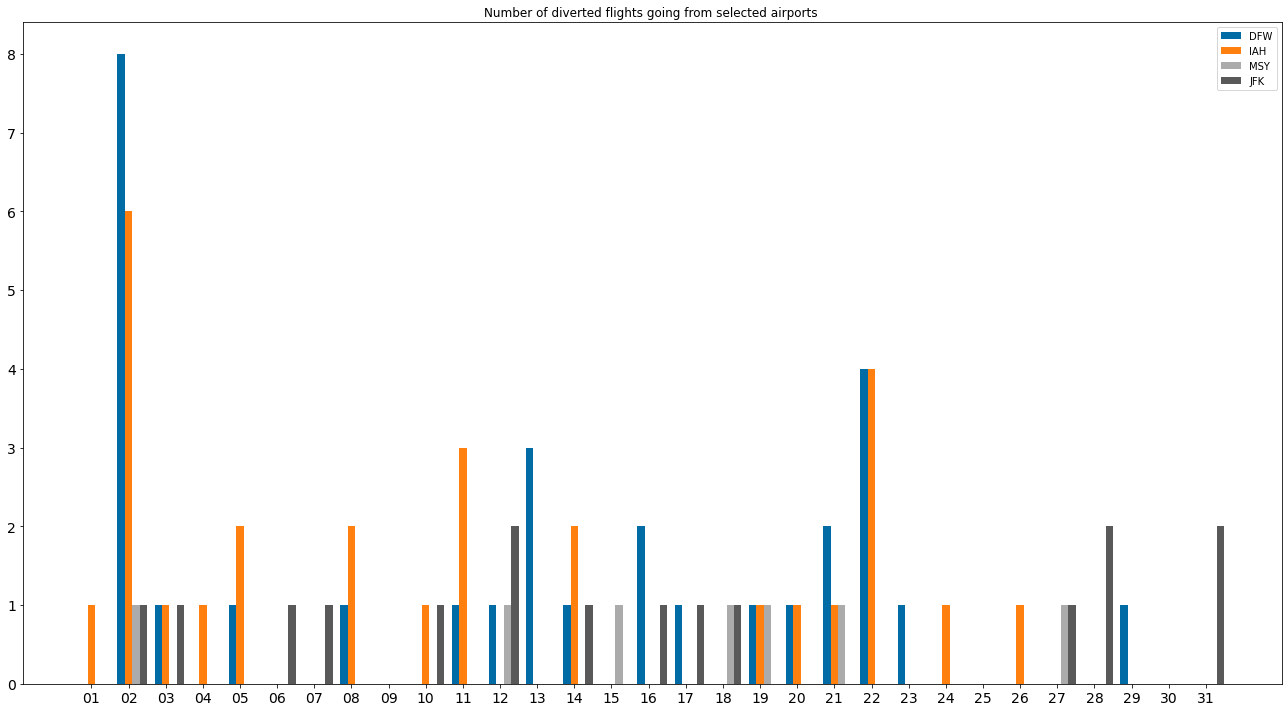

In [16]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize= (18,10))

date_list = list(diverted_origin.reset_index(0)['flight_date'].dt.strftime('%d'))
x_indexes = np.arange(len(date_list))
width = 0.2

plt.bar(x_indexes - width, diverted_origin['DFW'], width=width, label= 'DFW')
plt.bar(x_indexes, diverted_origin['IAH'], width=width, label= 'IAH')
plt.bar(x_indexes + width, diverted_origin['MSY'], width=width, label = 'MSY')
plt.bar(x_indexes + 2*width, diverted_origin['JFK'], width=width, label = 'JFK')

plt.title("Number of diverted flights going from selected airports ")
plt.xticks(ticks= x_indexes, labels= date_list, fontsize= 14)
plt.yticks(fontsize= 14)

plt.legend()
plt.tight_layout()

## call flight table (faw_dest_g5)

In [17]:
dest_df = sf.get_dataframe(f'SELECT * FROM {schema}.faw_dest_g5')
dest_df

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,...,alt,tz,dst,city,country,date,avg_temp,rain,wind_speed,w_faa
0,2017-08-12,1745.0,1742,3.0,2011.0,2005,6.0,B6,N556JB,478,...,13,-5.0,A,New York,United States,2017-08-12,21.9,5.3,12.2,JFK
1,2017-08-12,1111.0,1108,3.0,1224.0,1222,2.0,B6,N337JB,485,...,13,-5.0,A,New York,United States,2017-08-12,21.9,5.3,12.2,JFK
2,2017-08-12,728.0,732,-4.0,955.0,1006,-11.0,B6,N975JB,490,...,13,-5.0,A,New York,United States,2017-08-12,21.9,5.3,12.2,JFK
3,2017-08-12,1131.0,1125,6.0,1357.0,1354,3.0,B6,N558JB,500,...,13,-5.0,A,New York,United States,2017-08-12,21.9,5.3,12.2,JFK
4,2017-08-12,811.0,812,-1.0,1101.0,1100,1.0,B6,N907JB,502,...,13,-5.0,A,New York,United States,2017-08-12,21.9,5.3,12.2,JFK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39480,2017-08-12,1125.0,1129,-4.0,1956.0,2018,-22.0,B6,N979JB,416,...,13,-5.0,A,New York,United States,2017-08-12,21.9,5.3,12.2,JFK
39481,2017-08-12,1500.0,1456,4.0,1615.0,1612,3.0,B6,N519JB,417,...,13,-5.0,A,New York,United States,2017-08-12,21.9,5.3,12.2,JFK
39482,2017-08-12,1304.0,1300,4.0,2121.0,2131,-10.0,B6,N942JB,424,...,13,-5.0,A,New York,United States,2017-08-12,21.9,5.3,12.2,JFK
39483,2017-08-12,1722.0,1704,18.0,1957.0,1959,-2.0,B6,N603JB,426,...,13,-5.0,A,New York,United States,2017-08-12,21.9,5.3,12.2,JFK


## check cancelled flights for dest airport

### Pivot table (cancelled_dest)

In [18]:
cancelled_dest = pd.pivot_table(dest_df, 
                                values= 'cancelled',
                                index= 'flight_date',
                                columns='dest',
                                aggfunc= np.sum)
cancelled_dest

dest,DFW,IAH,JFK,MSY
flight_date,,,,
2017-08-01,1,0,3,0
2017-08-02,7,5,37,1
2017-08-03,8,5,23,1
2017-08-04,5,0,22,4
2017-08-05,4,5,3,3
2017-08-06,35,1,1,0
2017-08-07,1,22,12,5
2017-08-08,0,6,3,0
2017-08-09,2,0,1,0


### Line graph (cancelled_dest)

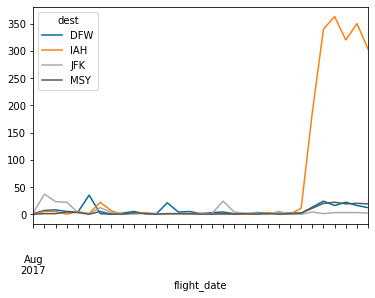

In [19]:
cancelled_dest.plot(xticks=cancelled_dest.index);

### Bar chart (cancelled_dest)

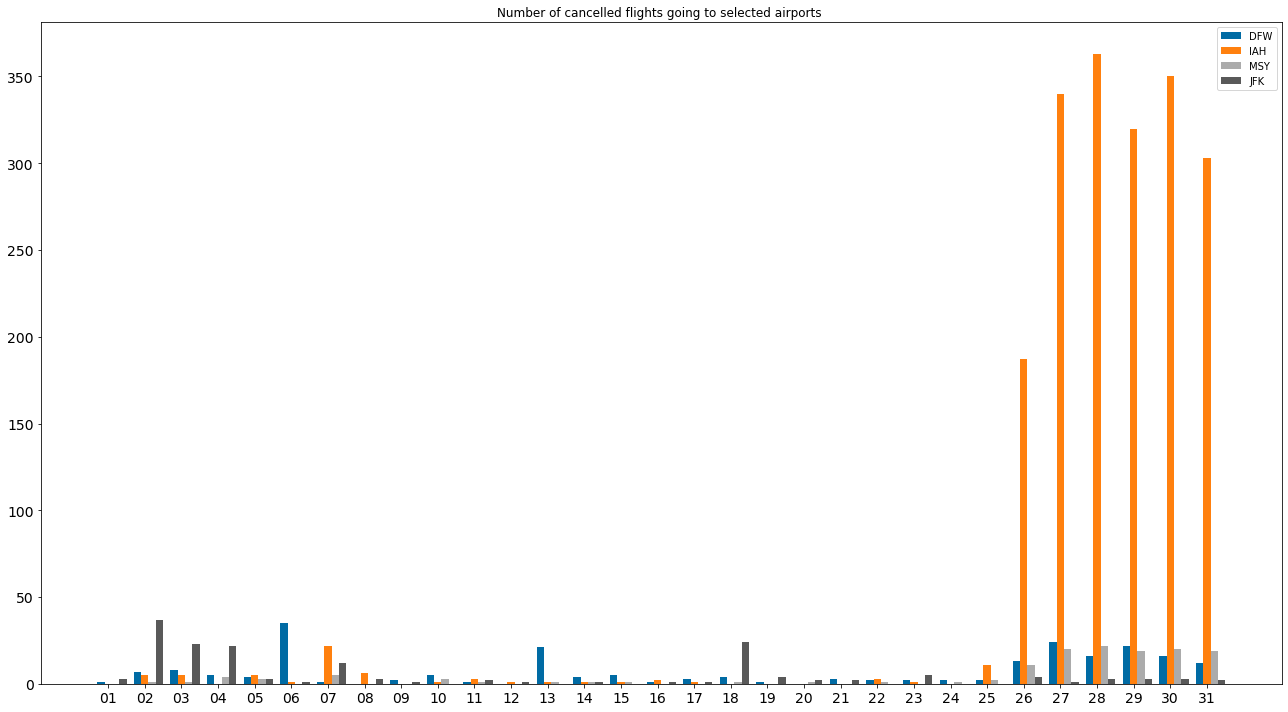

In [20]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize= (18,10))

date_list = list(cancelled_dest.reset_index(0)['flight_date'].dt.strftime('%d'))
x_indexes = np.arange(len(date_list))
width = 0.2

plt.bar(x_indexes - width, cancelled_dest['DFW'], width=width, label= 'DFW')
plt.bar(x_indexes, cancelled_dest['IAH'], width=width, label= 'IAH')
plt.bar(x_indexes + width, cancelled_dest['MSY'], width=width, label = 'MSY')
plt.bar(x_indexes + 2*width, cancelled_dest['JFK'], width=width, label = 'JFK')

plt.title("Number of cancelled flights going to selected airports ")
plt.xticks(ticks= x_indexes, labels= date_list, fontsize= 14)
plt.yticks(fontsize= 14)

plt.legend()
plt.tight_layout()

## check diverted flights for dest airport

### Pivot table (diverted_dest)

In [21]:
diverted_dest = pd.pivot_table(dest_df, 
                               values= 'diverted',
                               index= 'flight_date',
                               columns='dest',
                               aggfunc= np.sum)
diverted_dest

dest,DFW,IAH,JFK,MSY
flight_date,,,,
2017-08-01,0,0,0,0
2017-08-02,0,9,25,0
2017-08-03,1,1,1,0
2017-08-04,0,2,13,1
2017-08-05,0,1,2,0
2017-08-06,0,5,0,0
2017-08-07,6,2,0,0
2017-08-08,0,0,0,0
2017-08-09,0,0,0,0


### Line graph (diverted_dest)

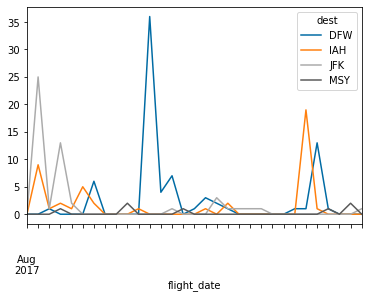

In [22]:
diverted_dest.plot(xticks=diverted_dest.index);

### Bar chart (diverted_dest)

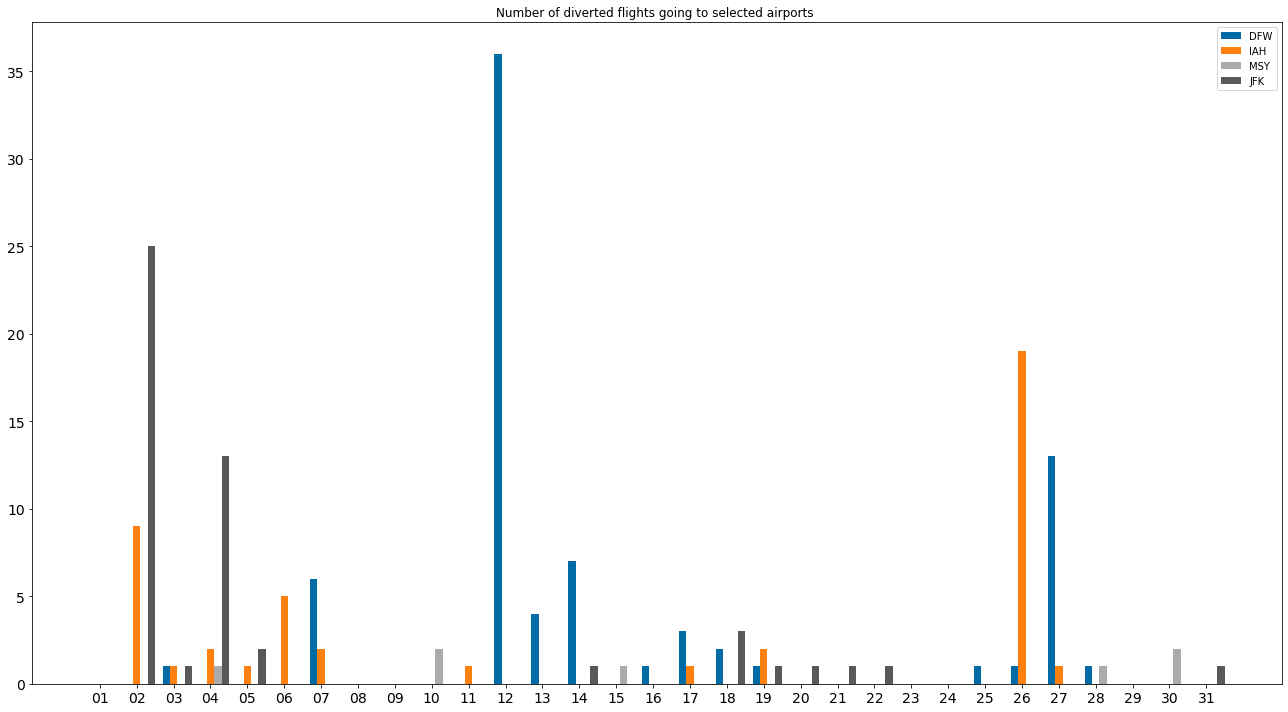

In [23]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize= (18,10))

date_list = list(diverted_dest.reset_index(0)['flight_date'].dt.strftime('%d'))
x_indexes = np.arange(len(date_list))
width = 0.2

plt.bar(x_indexes - width, diverted_dest['DFW'], width=width, label= 'DFW')
plt.bar(x_indexes, diverted_dest['IAH'], width=width, label= 'IAH')
plt.bar(x_indexes + width, diverted_dest['MSY'], width=width, label = 'MSY')
plt.bar(x_indexes + 2*width, diverted_dest['JFK'], width=width, label = 'JFK')

plt.title("Number of diverted flights going to selected airports ")
plt.xticks(ticks= x_indexes, labels= date_list, fontsize= 14)
plt.yticks(fontsize= 14)

plt.legend()
plt.tight_layout()

## call weather table (weather_all_g5)

In [24]:
weather_df = sf.get_dataframe(f'SELECT * FROM {schema}.weather_all_g5')
weather_df

,date,avg_temp,rain,wind_speed,w_faa
0,2017-08-01,28.2,0.0,12.2,IAH
1,2017-08-02,27.3,2.3,11.2,IAH
2,2017-08-03,26.1,0.0,9.4,IAH
3,2017-08-04,27.6,32.0,7.6,IAH
4,2017-08-05,27.3,9.9,8.3,IAH
...,...,...,...,...,...
119,2017-08-27,27.8,19.1,9.7,MSY
120,2017-08-28,25.8,35.1,14.8,MSY
121,2017-08-29,25.2,79.5,20.2,MSY
122,2017-08-30,26.8,17.0,25.2,MSY


## Check wind

### Pivot table (wind_speed)

In [25]:
wind_speed = pd.pivot_table(weather_df, 
                            values= 'wind_speed',
                            index= 'date',
                            columns='w_faa')
wind_speed

w_faa,DFW,IAH,JFK,MSY
date,,,,
2017-08-01,10.1,12.2,13.0,11.9
2017-08-02,6.8,11.2,11.9,11.2
2017-08-03,6.8,9.4,12.2,10.4
2017-08-04,7.2,7.6,18.7,9.0
2017-08-05,19.8,8.3,20.5,7.6
2017-08-06,21.6,10.8,19.8,8.6
2017-08-07,13.3,8.6,11.5,9.7
2017-08-08,15.5,7.6,13.7,7.9
2017-08-09,9.7,8.6,12.2,7.2


### Line chart (wind_speed)

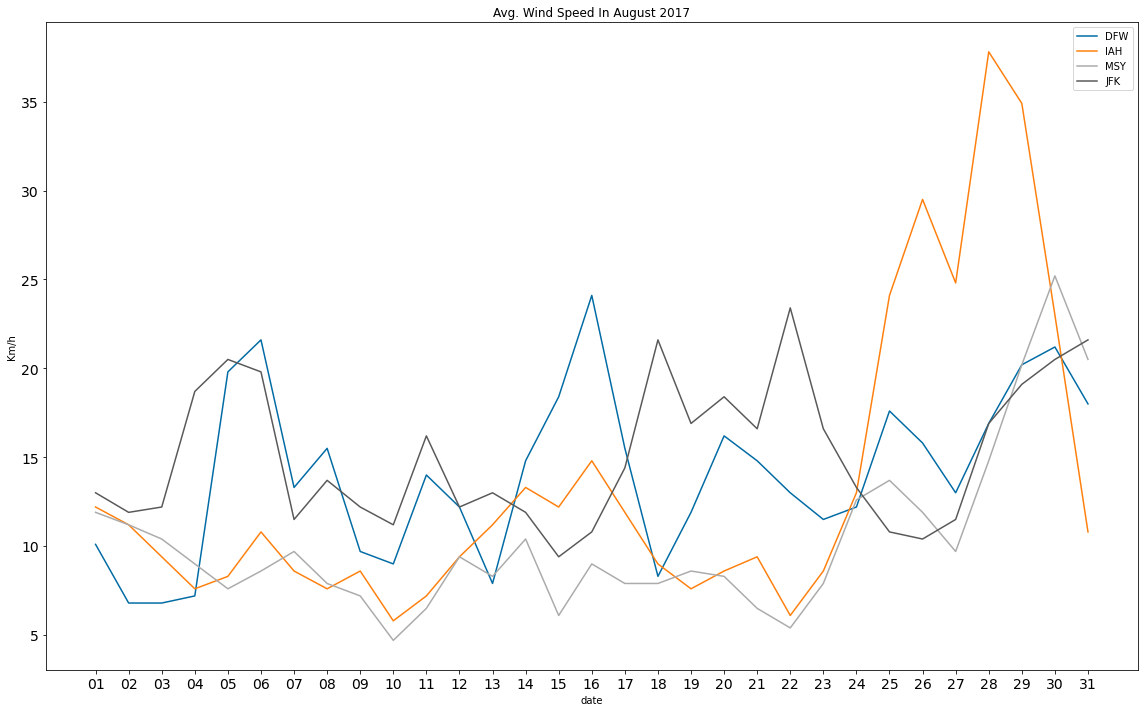

In [26]:
date_list = list(cancelled_dest.reset_index(0)['flight_date'].dt.strftime('%d'))
plt.style.use('tableau-colorblind10')
plt.figure(figsize= (16,10))

plt.plot(date_list, wind_speed['DFW'], label='DFW')
plt.plot(date_list, wind_speed['IAH'],label='IAH')
plt.plot(date_list, wind_speed['MSY'],label='MSY')
plt.plot(date_list, wind_speed['JFK'],label='JFK')

plt.title("Avg. Wind Speed In August 2017")
plt.ylabel('Km/h')
plt.xlabel('date')
plt.xticks(ticks= x_indexes, labels= date_list, fontsize= 14)
plt.yticks(fontsize= 14)

plt.legend()
plt.tight_layout()

## Check rain

### Pivot table (rain)

In [27]:
rain  = pd.pivot_table(weather_df, 
                            values= 'rain',
                            index= 'date',
                            columns='w_faa')
rain

w_faa,DFW,IAH,JFK,MSY
date,,,,
2017-08-01,1.0,0.0,0.0,0.0
2017-08-02,10.9,2.3,0.3,0.3
2017-08-03,0.0,0.0,0.0,52.3
2017-08-04,0.0,32.0,1.5,24.9
2017-08-05,0.0,9.9,6.9,12.7
2017-08-06,1.0,2.5,0.0,2.8
2017-08-07,0.0,54.1,9.9,6.1
2017-08-08,0.3,91.7,0.0,10.9
2017-08-09,0.0,0.0,0.0,23.6


### Line chart (rain)

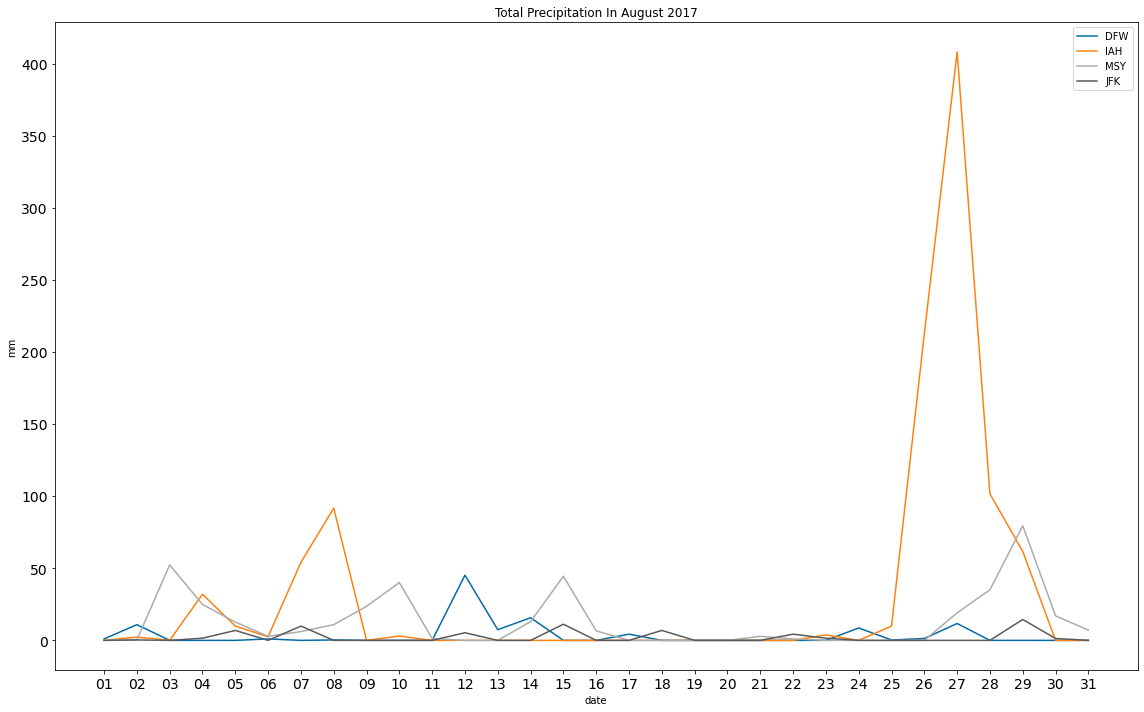

In [28]:
date_list = list(cancelled_dest.reset_index(0)['flight_date'].dt.strftime('%d'))
plt.style.use('tableau-colorblind10')
plt.figure(figsize= (16,10))

plt.plot(date_list, rain['DFW'], label='DFW')
plt.plot(date_list, rain['IAH'],label='IAH')
plt.plot(date_list, rain['MSY'],label='MSY')
plt.plot(date_list, rain['JFK'],label='JFK')

plt.title("Total Precipitation In August 2017")
plt.ylabel('mm')
plt.xlabel('date')
plt.xticks(ticks= x_indexes, labels= date_list, fontsize= 14)
plt.yticks(fontsize= 14)

plt.legend()
plt.tight_layout()

## Correlation Test on cancelled flights for origin airport and wind speed

In [ ]:
cancelled_origin = pd.pivot_table(origin_df,
                                  values= 'cancelled',
                                  index= 'flight_date',
                                  columns='origin',
                                  aggfunc= np.sum)

In [ ]:
wind_speed = pd.pivot_table(weather_df, 
                            values= 'wind_speed',
                            index= 'date',
                            columns='w_faa')

In [29]:
cancelled_origin_wind = pd.merge(cancelled_origin, wind_speed, left_on='flight_date', right_on= 'date')
cancelled_origin_wind.corr(method = 'pearson')

,DFW_x,IAH_x,JFK_x,MSY_x,DFW_y,IAH_y,JFK_y,MSY_y
DFW_x,1.000000,0.674916,0.079196,0.676911,0.150496,0.527803,-0.010818,0.454026
IAH_x,0.674916,1.000000,-0.139940,0.982049,0.369919,0.780681,0.223933,0.761779
JFK_x,0.079196,-0.139940,1.000000,-0.067268,-0.526227,-0.160555,0.069754,-0.021654
MSY_x,0.676911,0.982049,-0.067268,1.000000,0.370738,0.762629,0.267496,0.779962
DFW_y,0.150496,0.369919,-0.526227,0.370738,1.000000,0.410097,0.189999,0.372855
IAH_y,0.527803,0.780681,-0.160555,0.762629,0.410097,1.000000,-0.084260,0.624330
JFK_y,-0.010818,0.223933,0.069754,0.267496,0.189999,-0.084260,1.000000,0.239420
MSY_y,0.454026,0.761779,-0.021654,0.779962,0.372855,0.624330,0.239420,1.000000


## Visual correlation between cancelled flights for origin airport and wind speed

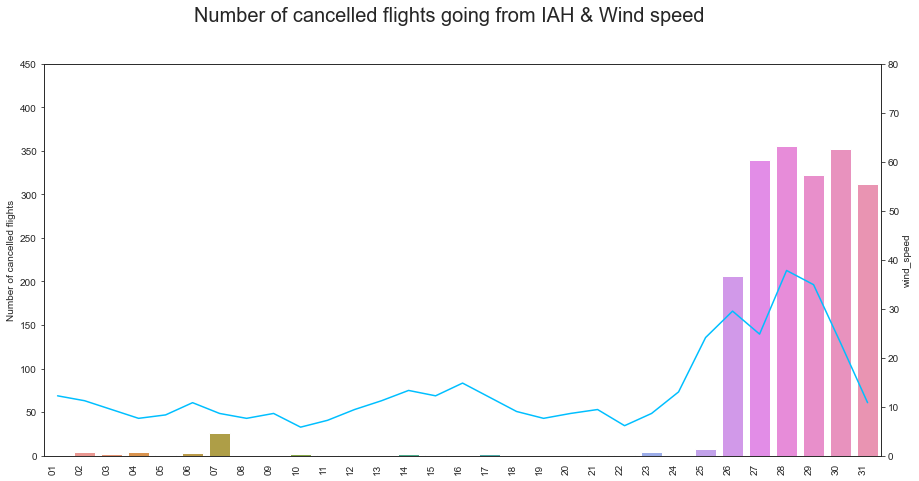

In [30]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(15, 8))
ax2 = ax.twinx()
date_list = list(diverted_dest.reset_index(0)['flight_date'].dt.strftime('%d'))
sns.lineplot(data= cancelled_origin_wind, x= date_list, y='IAH_y', color= 'deepskyblue', ax=ax2)
sns.barplot(data=cancelled_origin_wind, x= date_list, y='IAH_x',ax=ax)

plt.suptitle('Number of cancelled flights going from IAH & Wind speed', fontsize=20)
ax2.set_ylabel('wind_speed')
ax.set_ylabel('Number of cancelled flights')

fig.autofmt_xdate(rotation=90)
ax.set_ylim(0, 450)
ax2.set_ylim(0, 80);

## Correlation Test on cancelled flights for origin airport and rain

In [31]:
cancelled_origin_rain = pd.merge(cancelled_origin, rain, left_on='flight_date', right_on= 'date')
cancelled_origin_rain.corr(method = 'pearson')

,DFW_x,IAH_x,JFK_x,MSY_x,DFW_y,IAH_y,JFK_y,MSY_y
DFW_x,1.000000,0.674916,0.079196,0.676911,0.405139,0.590618,0.224040,0.251978
IAH_x,0.674916,1.000000,-0.139940,0.982049,-0.072775,0.559012,0.095822,0.381858
JFK_x,0.079196,-0.139940,1.000000,-0.067268,0.000486,-0.062419,0.119692,0.001721
MSY_x,0.676911,0.982049,-0.067268,1.000000,-0.121350,0.501403,0.085010,0.413690
DFW_y,0.405139,-0.072775,0.000486,-0.121350,1.000000,0.075741,0.021365,-0.187924
IAH_y,0.590618,0.559012,-0.062419,0.501403,0.075741,1.000000,-0.050206,0.121123
JFK_y,0.224040,0.095822,0.119692,0.085010,0.021365,-0.050206,1.000000,0.464538
MSY_y,0.251978,0.381858,0.001721,0.413690,-0.187924,0.121123,0.464538,1.000000


## Visual correlation between cancelled flights for origin airport and rain

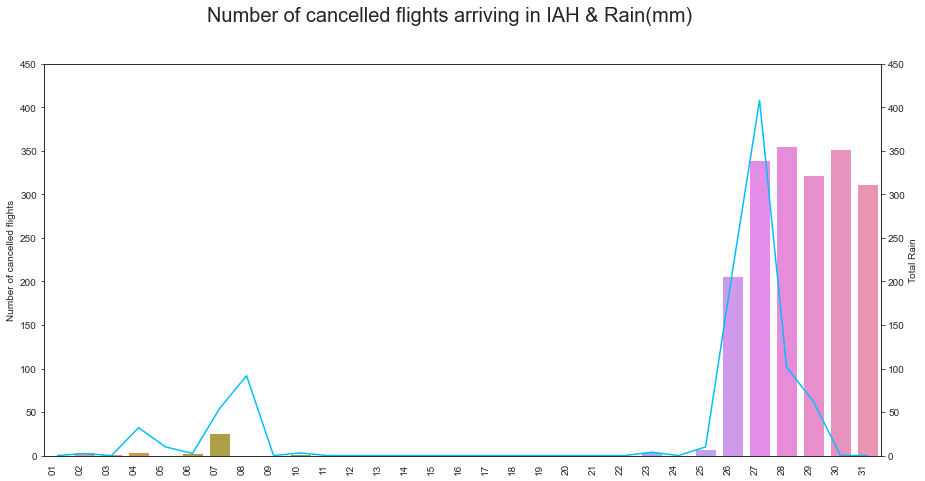

In [32]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(15, 8))
ax2 = ax.twinx()
date_list = list(diverted_dest.reset_index(0)['flight_date'].dt.strftime('%d'))
sns.lineplot(data= cancelled_origin_rain, x= date_list, y='IAH_y', color= 'deepskyblue', ax=ax2)
sns.barplot(data=cancelled_origin_rain, x= date_list, y='IAH_x',ax=ax)

plt.suptitle('Number of cancelled flights arriving in IAH & Rain(mm)', fontsize=20)
ax2.set_ylabel('Total Rain')
ax.set_ylabel('Number of cancelled flights')

fig.autofmt_xdate(rotation=90)
ax.set_ylim(0, 450)
ax2.set_ylim(0, 450);